In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats
import statsmodels.api as sm 

In [187]:
Filepath= r"Dataset.csv"
df=pd.read_csv(Filepath)
df.index = pd.to_datetime(df['Time'])
df = df.drop(columns=['Time'])
print(df.head())

                         Latitude  Longitude  Depth/Km  Magnitude
Time                                                             
2016-08-24 03:36:32.000   42.6983    13.2335       8.1        6.0
2016-08-24 03:37:26.580   42.7123    13.2533       9.0        4.5
2016-08-24 03:40:46.590   42.7647    13.1723       9.7        3.8
2016-08-24 03:41:38.900   42.7803    13.1683       9.7        3.9
2016-08-24 03:42:07.170   42.7798    13.1575       9.7        3.6


<AxesSubplot:xlabel='Latitude', ylabel='Count'>

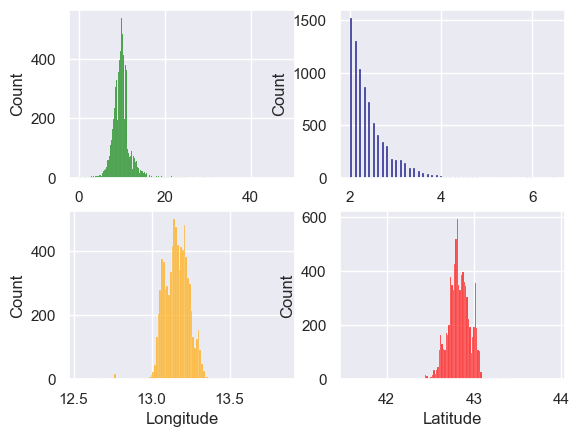

In [188]:
sns.set()
ghist, axes = plt.subplots(2, 2)
sns.histplot(data=df,x='Depth/Km',ax=axes[0,0],color='green')
sns.histplot(data=df,x='Magnitude',ax=axes[0,1],color='navy')
sns.histplot(data=df,x='Longitude',ax=axes[1,0],color='orange')
sns.histplot(data=df,x='Latitude',ax=axes[1,1],color='red')

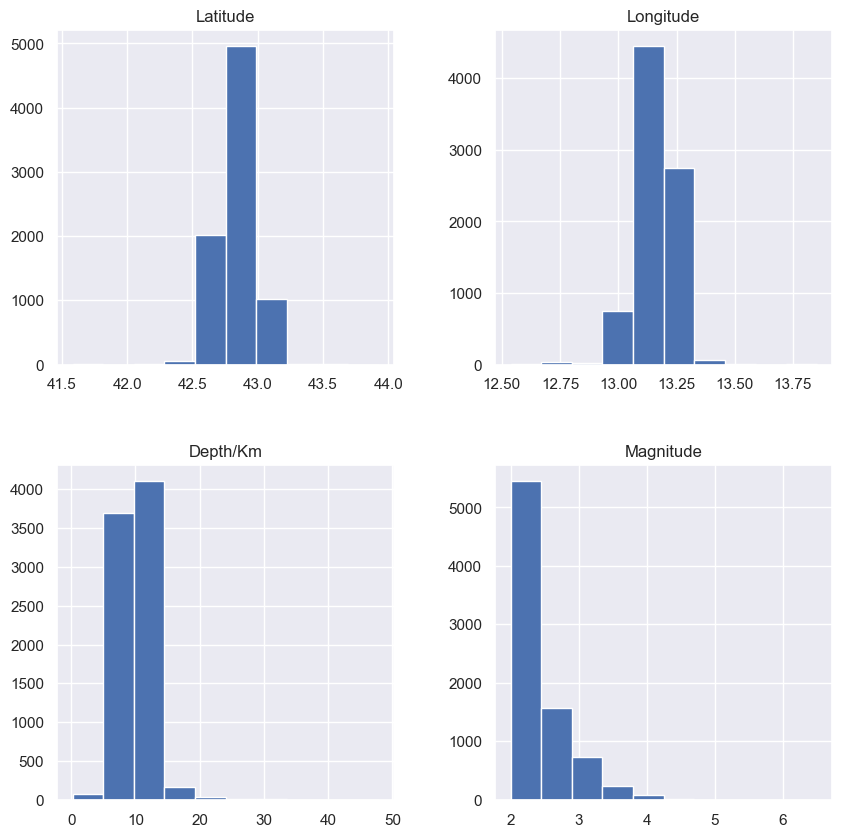

In [189]:
df.iloc[:,:].hist(figsize=(10,10))
plt.show()

In [190]:
df.describe()

,Latitude,Longitude,Depth/Km,Magnitude
count,8086.000000,8086.000000,8086.000000,8086.000000
mean,42.829557,13.161034,9.968328,2.398368
std,0.125927,0.083058,2.194064,0.426381
min,41.581300,12.537700,0.200000,2.000000
25%,42.751350,13.103200,8.900000,2.100000
50%,42.821800,13.160700,9.900000,2.300000
75%,42.911000,13.215650,10.800000,2.600000
max,43.927300,13.852500,47.900000,6.500000


<AxesSubplot:title={'center':'Mapa de calor con respecto \n a la correlación de la base de datos'}>

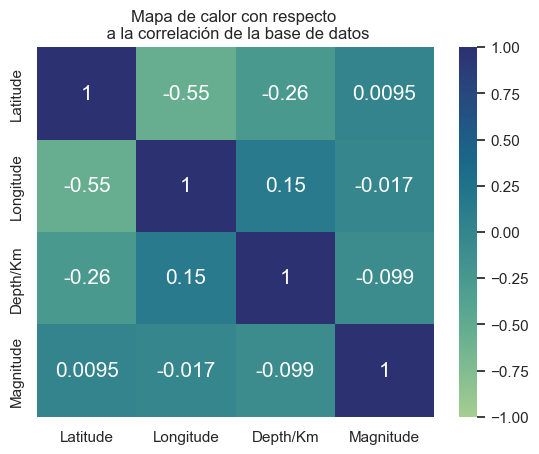

In [191]:
matriz=df.corr(method='pearson',numeric_only=float)
plt.title('Mapa de calor con respecto \n a la correlación de la base de datos')
sns.heatmap(matriz,cmap='crest',annot=True,
           annot_kws={'fontsize':15}
           ,vmin=-1,vmax=1)

<AxesSubplot:ylabel='Latitude'>

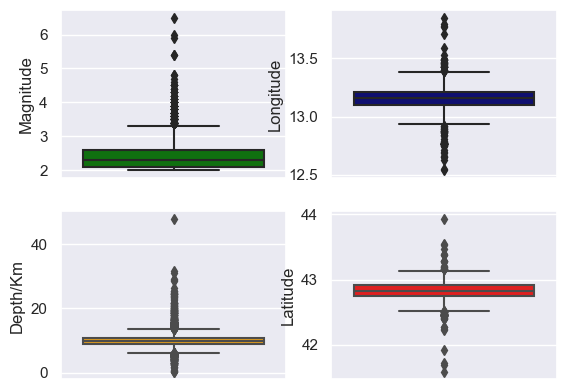

In [192]:
sns.set()
gbox, axes = plt.subplots(2, 2)
sns.boxplot(data=df,y='Magnitude',ax=axes[0,0],color='green')
sns.boxplot(data=df,y='Longitude',ax=axes[0,1],color='navy')
sns.boxplot(data=df,y='Depth/Km',ax=axes[1,0],color='orange')
sns.boxplot(data=df,y='Latitude',ax=axes[1,1],color='red')

<AxesSubplot:xlabel='Latitude', ylabel='Magnitude'>

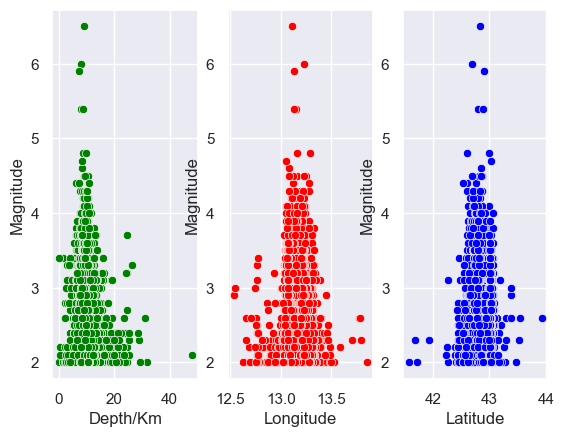

In [193]:
sns.set()
gscar2, axes = plt.subplots(1, 3)
sns.scatterplot(data=df,x='Depth/Km',y='Magnitude',ax=axes[0],color='green')
sns.scatterplot(data=df,x='Longitude',y='Magnitude',ax=axes[1],color='red')
sns.scatterplot(data=df,x='Latitude',y='Magnitude',ax=axes[2],color='blue')
#sns.scatterplot(data=df,x='Depth/Km',y='Magnitude',ax=axes[1,1],color='yellow')

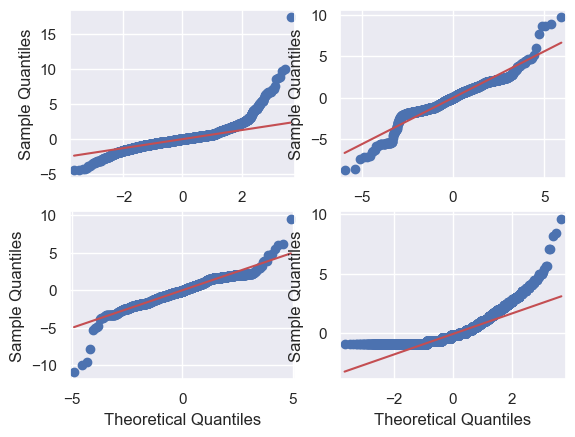

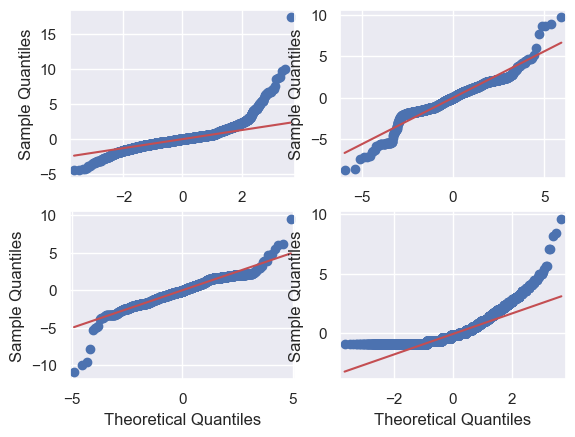

In [194]:
sns.set()
gqdur, axes = plt.subplots(2, 2)
sm.qqplot(data=df['Depth/Km'] , dist=stats.t ,fit=True ,ax=axes[0,0], line= 'q')
sm.qqplot(data=df['Longitude'] , dist=stats.t ,fit=True ,ax=axes[0,1], line= 'q')
sm.qqplot(data=df['Latitude'] , dist=stats.t ,fit=True ,ax=axes[1,0], line= 'q')
sm.qqplot(data=df['Magnitude'] , dist=stats.norm, fit=True ,ax=axes[1,1], line= 'q')

In [195]:
df['MagnitudeNorm']=(df['Magnitude']-df['Magnitude'].mean())/(df['Magnitude'].std())
df['DepthNorm']=(df['Depth/Km']-df['Depth/Km'].mean())/(df['Depth/Km'].std())
df['LatitudeNorm']=(df['Latitude']-df['Latitude'].mean())/(df['Latitude'].std())
df['LongitudeNorm']=(df['Longitude']-df['Longitude'].mean())/(df['Longitude'].std())
df['MagnitudeInt']=df['Magnitude'].astype(int)

<AxesSubplot:ylabel='LatitudeNorm'>

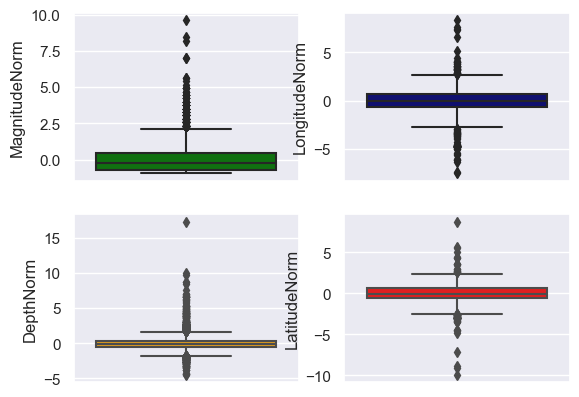

In [196]:
sns.set()
gboxNorm, axes = plt.subplots(2, 2)
sns.boxplot(data=df,y='MagnitudeNorm',ax=axes[0,0],color='green')
sns.boxplot(data=df,y='LongitudeNorm',ax=axes[0,1],color='navy')
sns.boxplot(data=df,y='DepthNorm',ax=axes[1,0],color='orange')
sns.boxplot(data=df,y='LatitudeNorm',ax=axes[1,1],color='red')

<AxesSubplot:xlabel='LatitudeNorm', ylabel='MagnitudeNorm'>

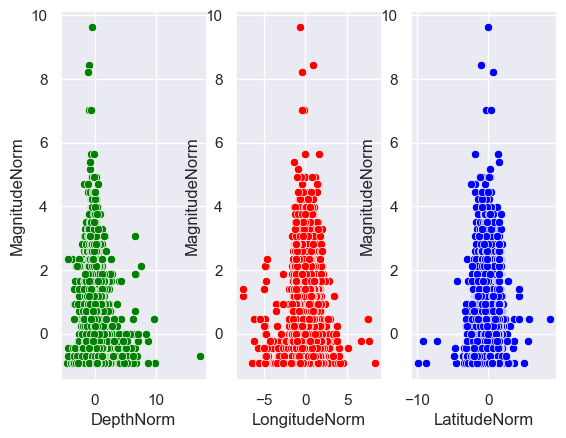

In [197]:
sns.set()
gscar2, axes = plt.subplots(1, 3)
sns.scatterplot(data=df,x='DepthNorm',y='MagnitudeNorm',ax=axes[0],color='green')
sns.scatterplot(data=df,x='LongitudeNorm',y='MagnitudeNorm',ax=axes[1],color='red')
sns.scatterplot(data=df,x='LatitudeNorm',y='MagnitudeNorm',ax=axes[2],color='blue')

<AxesSubplot:xlabel='Depth/Km', ylabel='Density'>

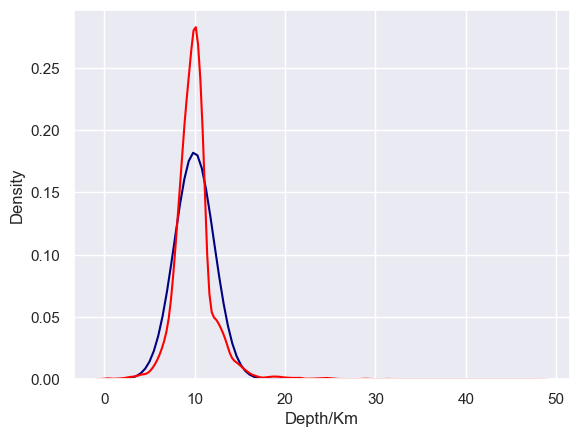

In [171]:
def AproxGra(dfa,col,dists):
    dist=dists
    paradist= dist.fit(data=dfa[col])
    xd=np.linspace(dfa[col].min(),dfa[col].max(),100)
    yd=dist.pdf(xd,*paradist)
    return xd, yd, paradist

x1,y1,p1 = AproxGra(df,'Depth/Km',stats.t)
plt.plot(x1,y1,label='energias 6-12',color='navy')
sns.kdeplot(data=df, x='Depth/Km', label='original data', color='red')

In [198]:
X=df.iloc[:,[0,1,2]]
XN=df.iloc[:,[0,1,2,3]]
Y=df.iloc[:,[8]]

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [200]:
X_train, X_test , Y_train , Y_test = train_test_split(X, Y , random_state=40)
X_train.head()

,Latitude,Longitude,Depth/Km
Time,,,
2016-08-28 18:54:40.800,42.7862,13.1687,11.1
2016-10-23 03:48:12.400,42.5572,13.2663,12.2
2016-08-26 09:56:40.350,42.7780,13.2133,9.2
2016-10-29 14:50:59.250,42.8048,13.2207,10.0
2016-10-31 00:05:46.430,42.7588,13.1957,10.3


In [201]:
Scaler=StandardScaler().fit(X_train)
ScalerP=StandardScaler().fit(XN)
#ScalerV=StandardScaler().fit(X)

In [202]:
X_train_scaled=Scaler.transform(X_train)
X_scaled=ScalerP.transform(XN)
#Y_scaled=ScalerV.transform(Y)
print(X_scaled)

[[-1.04238786  0.87253243 -0.85159024  8.44750587]
 [-0.93120583  1.11093433 -0.44136718  4.92930712]
 [-0.5150674   0.13565382 -0.1223048   3.28748103]
 ...
 [ 1.42664725 -0.38810794 -0.89717058 -0.46526431]
 [ 1.51003377 -0.71440549 -0.30462616  0.70746861]
 [ 1.30196455 -1.0322747  -0.21346548 -0.23071773]]


In [203]:
x_transformedLat = X_scaled[:, 1]
x_transformedLon = X_scaled[:, 2]
x_transformedDepth = X_scaled[:, 3]

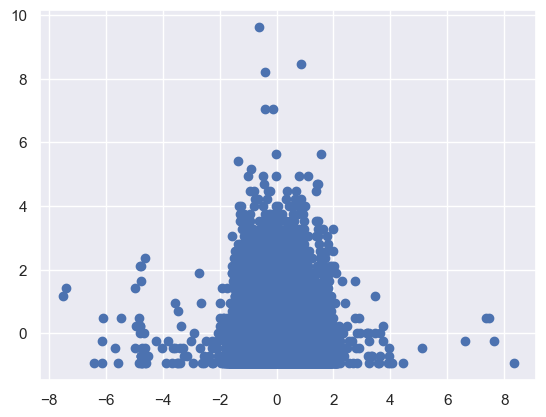

In [204]:
plt.scatter(x_transformedLat, x_transformedMag);

In [205]:
def AproxGrafNorm(a,distri):
    dist2=distri
    par=dist2.fit(data=a)
    xn=np.linspace(a.min(),a.max(),100)
    yn=dist2.pdf(xn,*paradistn)
    return xn,yn,par

XnDepth,YnDepth,ParDepth= AproxGrafNorm(x_transformedDepth,stats.t)
Xnlon,Ynlon,Parlon= AproxGrafNorm(x_transformedLon,stats.t)
Xnlat,Ynlat,Parlat= AproxGrafNorm(x_transformedLat,stats.t)

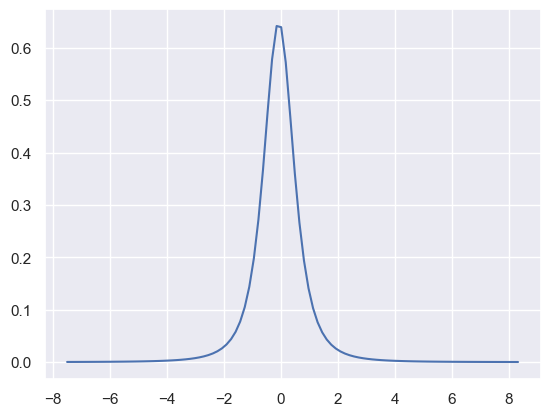

In [211]:
#plt.plot(XnDepth,YnDepth,color='red')
#plt.plot(Xnlon,Ynlon)
plt.plot(Xnlat,Ynlat)

In [207]:
#TO-DO
#-Realizar un EDA con los elementos normalizados
#-Despues del EDA se observa si se puede clasificar su magnitud en terminos de sus demas variables.
#-Realizar entonces clustering con dbscan o mirar un mejor metodo
#-Caso tal observar distintas distancias haciendo hincapie en la distancia de mahalanobis

In [ ]:
#min max escaler
from sklearn.preprocessing import MinMaxScaler